In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from scipy import stats

from src import dataset

In [2]:
data=dataset.Vta1Dataset(treatment="Saline", task="Task1")

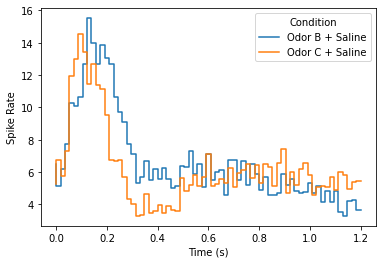

In [3]:
bin_count=70
bin_size=data.window/bin_count
fig, ax=plt.subplots()

X,_=data.linreg_X_Y(odors=["B"], bin_count=bin_count)

ax.step(np.linspace(0,data.window,bin_count), np.mean(X/bin_size, axis=0), label="Odor B + Saline")

X,_=data.linreg_X_Y(odors=["C"], bin_count=bin_count)

ax.step(np.linspace(0,data.window, bin_count), np.mean(X/bin_size, axis=0), label="Odor C + Saline")

ax.set_ylabel("Spike Rate")
ax.set_xlabel("Time (s)")
ax.legend(title="Condition")

In [4]:
def rasterplot(axis, trials):
    """ Makes a rasterplot of trials on matplotlib axis """
    for i, trial in enumerate(trials):
        axis.vlines(trial, i, i + 0.5)

Text(0.5, 0, 'Time (ms)')

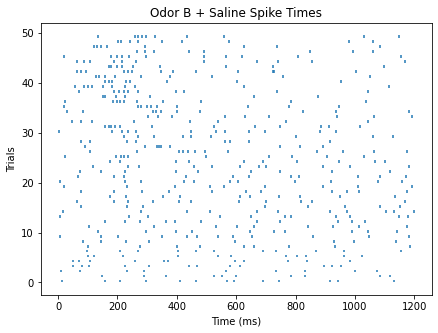

In [5]:
intervals,_=data.spike_times_per_trial("B")
fig, ax = plt.subplots(figsize=(7,5))

ax.set_title("Odor B + Saline Spike Times")
rasterplot(ax,[x.to_numpy() for x in intervals[0:50]])

ax.set_ylabel("Trials")
ax.set_xlabel("Time (ms)")

Text(0.5, 0, 'Time (ms)')

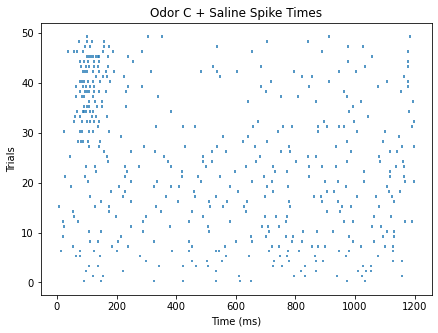

In [6]:
intervals,_=data.spike_times_per_trial("C")
fig, ax = plt.subplots(figsize=(7,5))

ax.set_title("Odor C + Saline Spike Times")
rasterplot(ax,[x.to_numpy() for x in intervals[0:50]])

ax.set_ylabel("Trials")
ax.set_xlabel("Time (ms)")

In [7]:
X,Y=data.linreg_X_Y(odors=["B", "C"])

Text(0.5, 0, 'Bin Number')

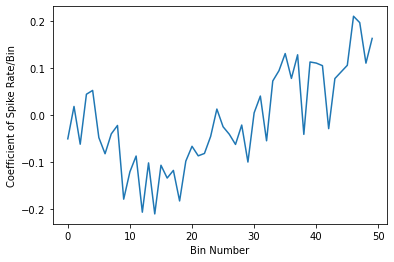

In [8]:
model = linear_model.LinearRegression()
model.fit(X,Y)
fig, ax = plt.subplots()
ax.plot(model.coef_)
ax.set_ylabel("Coefficient of Spike Rate/Bin")
ax.set_xlabel("Bin Number")

C:\Users\stepa\Documents\Python\envs\crcns-vta-1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.12196720202866917


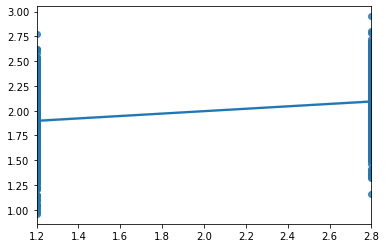

In [9]:
import seaborn as sns
sns.regplot(Y, model.predict(X))

# Calculate r squared
correlation_matrix = np.corrcoef(Y, model.predict(X))
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

1.0607485021744319e-05


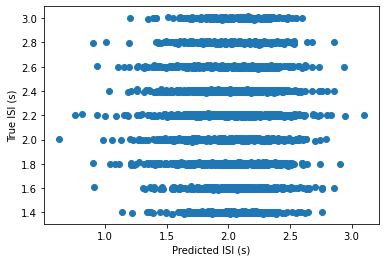

In [10]:
odor_a_hist, odor_a_time=data.linreg_X_Y(odors=["A"])
fig, ax = plt.subplots()
# Odor A estimate
np.random.seed(1234)
jitter=0.005
odor_a_est = model.predict(odor_a_hist)
ax.scatter(odor_a_est, odor_a_time + jitter* np.random.randn(len(odor_a_time)))


# Calculate r squared
correlation_matrix = np.corrcoef(odor_a_est, odor_a_time)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

ax.set_ylabel("True ISI (s)")
ax.set_xlabel("Predicted ISI (s)")


print(r_squared)

In [11]:
stats.describe(odor_a_est)

DescribeResult(nobs=5488, minmax=(0.6308513760527248, 3.0974435978704618), mean=2.022961687700424, variance=0.06688303426422935, skewness=-0.400189972832451, kurtosis=1.1161814298103998)